#### Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# You can get the dataset on Kaggle >>>>> kaggle : https://www.kaggle.com/c/titanic/data
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

combine = [data_train, data_test] ### all data in data_train and data_ test

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Get the data info

In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Cohen, Mr. Gurshon ""Gus""",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
data_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### Check NaN

In [5]:
print(data_train.isna().sum())
print('---'*35)
print(data_test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---------------------------------------------------------------------------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Data Visualization

#### Pclass >>> Passenger Class

In [6]:
data_class = data_train.groupby('Pclass')['Survived'].sum().reset_index()
data_class

,Pclass,Survived
0,1,136
1,2,87
2,3,119


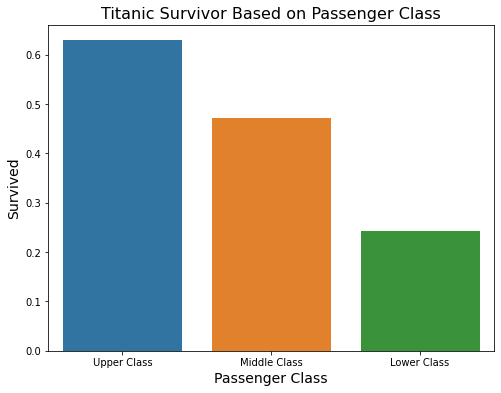

In [7]:
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', data=data_train, ci=None)
plt.xticks([0,1,2],['Upper Class', 'Middle Class', 'Lower Class'])
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Survived', fontsize=14)
plt.title('Titanic Survivor Based on Passenger Class', fontsize=16)
plt.show()

#### Sex

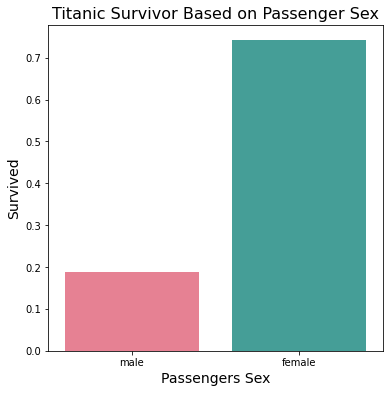

In [8]:
data_sex = data_train.groupby('Sex')['Survived'].sum().reset_index()

plt.figure(figsize=(6,6))
sns.barplot(x='Sex', y='Survived', data=data_train, ci=None, palette='husl')
plt.xlabel('Passengers Sex', fontsize=14)
plt.ylabel('Survived', fontsize=14)
plt.title('Titanic Survivor Based on Passenger Sex', fontsize=16)
plt.show()

In [9]:
data_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Embarked

In [10]:
print("Southampton :", data_train[data_train['Embarked']=='S'].shape[0])
print("Queenstown :", data_train[data_train['Embarked']=='Q'].shape[0])
print("Cherbough :", data_train[data_train['Embarked']=='C'].shape[0])

Southampton : 644
Queenstown : 77
Cherbough : 168


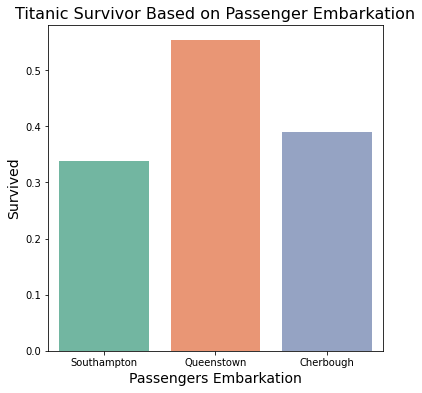

In [11]:
data_train['Embarked'] = data_train['Embarked'].fillna('S')

data_embarked = data_train.groupby('Embarked')['Survived'].sum().reset_index()

plt.figure(figsize=(6,6))
sns.barplot(x='Embarked', y='Survived', data=data_train, ci=None, palette='Set2')
plt.xlabel('Passengers Embarkation', fontsize=14)
plt.xticks([0,1,2], ['Southampton', 'Queenstown', 'Cherbough'])
plt.ylabel('Survived', fontsize=14)
plt.title('Titanic Survivor Based on Passenger Embarkation', fontsize=16)
plt.show()

#### Age

In [12]:
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].mean())
data_test['Age'] = data_test['Age'].fillna(data_test['Age'].mean())

In [13]:
data_train['Age'] = data_train['Age'].astype('int')
data_test['Age'] = data_test['Age'].astype('int')
data_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
def age_group(row):
    if row['Age']<=12:
        return 1
    elif row['Age']>12 and row['Age']<=18:
        return 2
    elif row['Age']>18 and row['Age']<=25:
        return 3
    elif row['Age']>25 and row['Age']<=55:
        return 4
    elif row['Age']>55:
        return 5
data_train['Age_Group'] = data_train.apply(age_group, axis=1)
data_test['Age_Group'] = data_test.apply(age_group, axis=1)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,4


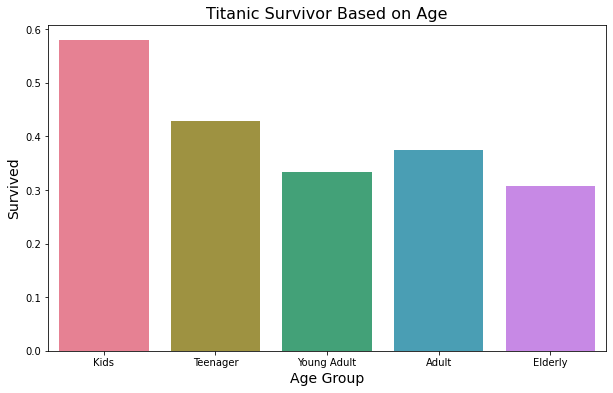

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='Age_Group', y='Survived', data=data_train, ci=None, palette='husl')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Survived', fontsize=14)
plt.xticks([0,1,2,3,4], ['Kids', 'Teenager', 'Young Adult', 'Adult', 'Elderly'])
plt.title('Titanic Survivor Based on Age', fontsize=16)
plt.show()

#### Family >>> SibSp, Parch

In [16]:
for dataset in combine: 
    dataset['Family'] = dataset['SibSp']+dataset['Parch']
    dataset['Family'] = dataset['Family'].apply(lambda x: 0 if x <1 else 1)
    
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,3,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,4,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,4,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,4,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,4,0


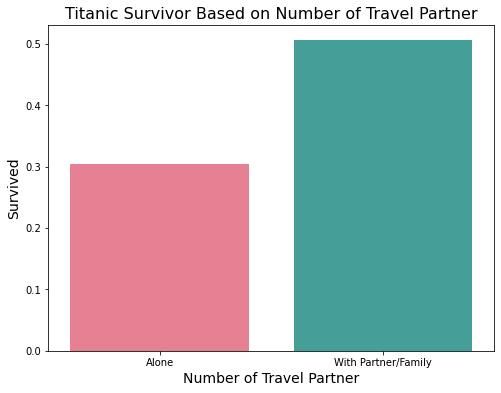

In [17]:
data_family = data_train.groupby('Family')['Survived'].sum().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Family', y='Survived', data=data_train, ci=None, palette='husl')
plt.xlabel('Number of Travel Partner', fontsize=14)
plt.ylabel('Survived', fontsize=14)
plt.xticks([0,1], ['Alone', 'With Partner/Family'])
plt.title('Titanic Survivor Based on Number of Travel Partner', fontsize=16)
plt.show()

#### Fare

In [18]:
data_train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [19]:
def fare_band(row):
    if row['Fare']<=7.91:
        return 1
    elif row['Fare']>7.91 and row['Fare']<=14.454:
        return 2
    elif row['Fare']>14.454 and row['Fare']<=31:
        return 3
    elif row['Fare']>31:
        return 4
data_train['Fare_Band'] = data_train.apply(fare_band, axis=1)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Family,Fare_Band
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,3,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,4,1,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,4,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,4,1,4
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,4,0,2


In [20]:
data_test['Fare'] = data_test['Fare'].fillna(data_test['Fare'].mean())

In [21]:
data_test['Fare_Band'] = data_test.apply(fare_band, axis=1)

### Data Wrangling

#### Get Title Name

In [22]:
for dataset in combine:    #### all dataset
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(data_train['Title'], data_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:
pd.crosstab(data_test['Title'], data_test['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


#### Change title

In [24]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Jonkheer', 'Don', 
                                                'Dr', 'Dona','Major', 'Rev', 'Countess', 'Lady', 'Sir'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
data_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [25]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Family,Fare_Band,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,3,1,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,4,1,4,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,4,0,2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,4,1,4,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,4,0,2,Mr


#### Map title

In [26]:
title_dict = {'Master':1, 'Miss':2, 'Mr':3, 'Mrs':4, 'Rare':5}
data_train['Title'] = data_train['Title'].apply(lambda x:title_dict[x])
data_test['Title'] = data_test['Title'].apply(lambda x:title_dict[x])

#### Map sex

In [27]:
sex_dict={'male':1,'female':2}
data_train['Sex'] = data_train['Sex'].apply(lambda x:sex_dict[x])
data_test['Sex'] = data_test['Sex'].apply(lambda x:sex_dict[x])

#### Map embarked

In [28]:
embarked_dict = {'S':1, 'C':2, 'Q':3}
data_train['Embarked'] = data_train['Embarked'].apply(lambda x:embarked_dict[x])
data_test['Embarked'] = data_test['Embarked'].apply(lambda x:embarked_dict[x])
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Family,Fare_Band,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,1,3,1,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38,1,0,PC 17599,71.2833,C85,2,4,1,4,4
2,3,1,3,"Heikkinen, Miss. Laina",2,26,0,0,STON/O2. 3101282,7.9250,NaN,1,4,0,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35,1,0,113803,53.1000,C123,1,4,1,4,4
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,1,4,0,2,3


In [29]:
data_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Age_Group        0
Family           0
Fare_Band        0
Title            0
dtype: int64

### Drop Columns

In [30]:
columns_train = ['PassengerId', 'Name', 'Age','SibSp','Parch', 'Ticket', 'Fare', 'Cabin']
data_train = data_train.drop(columns_train, axis=1)
data_train.head()

,Survived,Pclass,Sex,Embarked,Age_Group,Family,Fare_Band,Title
0,0,3,1,1,3,1,1,3
1,1,1,2,2,4,1,4,4
2,1,3,2,1,4,0,2,2
3,1,1,2,1,4,1,4,4
4,0,3,1,1,4,0,2,3


### Define features and target

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data_train.drop('Survived', axis=1)
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Size of features train :', X_train.shape)
print('Size of target train :', y_train.shape)
print('Size of features test :', X_test.shape)
print('Size of target test :', y_test.shape)

Size of features train : (712, 7)
Size of target train : (712,)
Size of features test : (179, 7)
Size of target test : (179,)


### Using SVM

In [32]:
from sklearn.svm import SVC

class_svc = SVC(kernel='linear')
class_svc = class_svc.fit(X_train, y_train)
svc_pred = class_svc.predict(X_test)
svc_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [33]:
acc_svc = round(accuracy_score(y_test, svc_pred)*100, 2)
print("Accuracy model using SVM :",acc_svc)

Accuracy model using SVM : 78.77


### Using Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

logreg_class = LogisticRegression()
logreg_class.fit(X_train, y_train)
logreg_pred = logreg_class.predict(X_test)
acc_logreg = round(accuracy_score(y_test,logreg_pred)*100, 2)
print("Accuracy model using Logistic Regression :", acc_logreg)

Accuracy model using Logistic Regression : 79.33


### Using Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

dec_class = DecisionTreeClassifier()
dec_class.fit(X_train, y_train)
dec_pred = dec_class.predict(X_test)
acc_dec = round(accuracy_score(y_test, dec_pred)*100, 2)
print("Accuracy model using Decision Tree :", acc_dec)

Accuracy model using Decision Tree : 83.24


### Using KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn_class = KNeighborsClassifier(n_neighbors=3)
knn_class.fit(X_train, y_train)
knn_pred = knn_class.predict(X_test)
acc_knn = round(accuracy_score(y_test, knn_pred)*100, 2)
print("Accuracy model using Logistic Regression :", acc_knn)

Accuracy model using Logistic Regression : 81.01


### Using SGD

In [37]:
from sklearn.linear_model import SGDClassifier

sgd_class = SGDClassifier()
sgd_class.fit(X_train, y_train)
sgd_pred = sgd_class.predict(X_test)
acc_sgd = round(accuracy_score(y_test, sgd_pred)*100, 2)
print("Accuracy model using SGD :", acc_sgd)

Accuracy model using SGD : 67.04


### Using LinearSVC

In [38]:
from sklearn.svm import LinearSVC

linsvc_class = LinearSVC()
linsvc_class.fit(X_train, y_train)
linsvc_pred = linsvc_class.predict(X_test)
acc_linsvc = round(accuracy_score(y_test, linsvc_pred)*100, 2)
print("Accuracy model using LinearSVC: ", acc_linsvc)

Accuracy model using LinearSVC:  77.65


/home/rohmi/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Using Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_class = RandomForestClassifier()
rf_class.fit(X_train, y_train)
rf_pred = rf_class.predict(X_test)
acc_rf = round(accuracy_score(y_test, rf_pred)*100, 2)
print("Accuracy model using Random Forest Classifier :", acc_rf)

Accuracy model using Random Forest Classifier : 83.24


### Using Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

gnb_class = GaussianNB()
gnb_class.fit(X_train, y_train)
gnb_pred = gnb_class.predict(X_test)
acc_gnb = round(accuracy_score(y_test, gnb_pred)*100, 2)
print("Accuracy model using Naive Bayes :", acc_gnb)

Accuracy model using Naive Bayes : 75.42


### Using Perceptron

In [41]:
from sklearn.linear_model import Perceptron

percep_class = Perceptron()
percep_class.fit(X_train, y_train)
percep_pred = percep_class.predict(X_test)
acc_percep = round(accuracy_score(y_test, percep_pred)*100, 2)
print("Accuracy model using Perceptron :", acc_percep)

Accuracy model using Perceptron : 65.92


### Using MLP

In [42]:
from sklearn.neural_network import MLPClassifier

mlp_class = MLPClassifier()
mlp_class.fit(X_train, y_train)
mlp_pred = mlp_class.predict(X_test)
acc_mlp = round(accuracy_score(y_test, mlp_pred)*100, 2)
print("Accuracy model using MLP :", acc_mlp)

Accuracy model using MLP : 80.45


/home/rohmi/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [43]:
from sklearn.ensemble import AdaBoostClassifier

ada_class = AdaBoostClassifier(n_estimators=100)
ada_class.fit(X_train, y_train)
ada_pred = ada_class.predict(X_test)
acc_ada = round(accuracy_score(y_test, ada_pred)*100,2)
print("Accuracy model using MLP :", acc_ada)

Accuracy model using MLP : 80.45


In [44]:
model_accuracy = pd.DataFrame({'Model':['SVM','Logistic Regression', 'Decision Tree', 
                                'KNN', 'SGD', 'LinearSVC', 'Random Forest',
                               'Naive Bayes', 'Perceptron', 'MLP', 'AdaBoost'], 
                               'Score':[acc_svc, acc_logreg, acc_dec, acc_knn, 
                               acc_sgd, acc_linsvc, acc_rf, acc_gnb, acc_percep, acc_mlp, acc_ada]})
model_accuracy.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,83.24
6,Random Forest,83.24
3,KNN,81.01
9,MLP,80.45
10,AdaBoost,80.45
1,Logistic Regression,79.33
0,SVM,78.77
5,LinearSVC,77.65
7,Naive Bayes,75.42
4,SGD,67.04


In [45]:
data_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Family,Fare_Band,Title
413,1305,3,"Spector, Mr. Woolf",1,30,0,0,A.5. 3236,8.0500,NaN,1,4,0,2,3
414,1306,1,"Oliva y Ocana, Dona. Fermina",2,39,0,0,PC 17758,108.9000,C105,2,4,0,4,5
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1,4,0,1,3
416,1308,3,"Ware, Mr. Frederick",1,30,0,0,359309,8.0500,NaN,1,4,0,2,3
417,1309,3,"Peter, Master. Michael J",1,30,1,1,2668,22.3583,NaN,2,4,1,3,1


In [46]:
data_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Age_Group        0
Family           0
Fare_Band        0
Title            0
dtype: int64

In [47]:
test_pred = data_test[['Pclass', 'Sex', 'Embarked', 'Age_Group', 'Family', 'Fare_Band', 'Title']]
y_pred = rf_class.predict(test_pred)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [48]:
submission = pd.DataFrame({'PassengerId':data_test['PassengerId'], 'Survived':y_pred})

In [49]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [50]:
#submission.to_csv('submission.csv', index=False)